# Bài tập 4

Nguyễn Trọng Nghĩa - 1712615

## Câu 1 (1 điểm)

- "95% confidence" nghĩa là $\delta = 0.05$; "your generalization error is at most 0.05" nghĩa là $\epsilon = 0.05$
- với $N > d_{VC}$ thì $m_\mathcal{H}(N) \approx N^{d_{VC}} \Rightarrow  m_\mathcal{H}(2N) \approx (2N)^{d_{VC}}$ (có $d_{VC}$ = 10)

Ta có: 
$$\epsilon = \sqrt{\frac{8}{N} ln \frac{4m_\mathcal{H}(2N)}{\delta} } $$
$$ \Leftrightarrow \epsilon = \sqrt{\frac{8}{N} ln \frac{2^{d_{VC}+2}N^{d_{VC}}}{\delta} }$$
$$ \Leftrightarrow \epsilon = \sqrt{\frac{8}{N} (ln 2^{d_{VC}+2} + ln N^{d_{VC}} - ln \delta) } $$


In [1]:
import math

def samplesize(δ,ϵ,dvc):
    Nstart = 10000*dvc
    epsilon = 0
    while abs(ϵ-epsilon) > 0.0001:
        epsilon = math.sqrt((8/Nstart)*math.log((2**(dvc+2)*Nstart**dvc)/δ))
        Nstart += 1
    return Nstart                            

In [2]:
print("Kích thước tập mẫu phù hợp là:",samplesize(0.05,0.05,10))

Kích thước tập mẫu phù hợp là: 451015


Đáp án là [d]

## Câu 2 (1 điểm)

Ta có: $\delta = 0.05$ , $d_{VC}$ = 50 và N =10000 , $\epsilon \geq  0$

In [3]:
N = 10000
dvc = 50
δ = 0.05
print("[a] ϵ <= {0}".format(math.sqrt((8/N)*math.log((2**(dvc+2)*N**dvc)/δ))))

[a] ϵ <= 0.632174915200836


In [4]:
print("[b] ϵ <= {0}".format(math.sqrt((2*math.log(2*N*N**dvc))/N) + math.sqrt((2/N)*math.log(1/δ)) + 1/N))

[b] ϵ <= 0.3313087859616395


In [5]:
print("[c] bất đẳng thức: {0}ϵ^2 + {1}ϵ + {2} <= 0".format(1,-2/N,(-1/N)*math.log((6*2**dvc*N**dvc)/δ)))
print("[c] ϵ <= {0}".format(0.2234831014)) # dùng máy tính casio để tính nghiệm 

[c] bất đẳng thức: 1ϵ^2 + -0.0002ϵ + -0.04999618693695885 <= 0
[c] ϵ <= 0.2234831014


In [6]:
print("[d] bất đẳng thức: {0}ϵ^2 + {1}ϵ + {2} <= 0".format(1-2/N,-2/N,(-1/(2*N))*(math.log(4*N**(2*dvc))-math.log(δ))))
print("[d] ϵ <= {0}".format(0.2152261827)) # dùng máy tính casio để tính nghiệm 

[d] bất đẳng thức: 0.9998ϵ^2 + -0.0002ϵ + -0.04627080319161461 <= 0
[d] ϵ <= 0.2152261827


Chặn trên nhỏ nhất của ϵ <= 0.2152261827 với N = 10000

Đáp án là: [d]

## Câu 3 (1 điểm)

In [7]:
N =5
print("[a] ϵ <= {0}".format(math.sqrt((8/N)*math.log((2**(dvc+2)*N**dvc)/δ))))

[a] ϵ <= 13.828161484991483


In [8]:
print("[b] ϵ <= {0}".format(math.sqrt((2*math.log(2*N*N**dvc))/N) + math.sqrt((2/N)*math.log(1/δ)) + 1/N))

[b] ϵ <= 7.048776564183685


In [9]:
print("[c] bất đẳng thức: {0}ϵ^2 + {1}ϵ + {2} <= 0".format(1,-2/N,(-1/N)*math.log((6*2**dvc*N**dvc)/δ)))
print("[c] ϵ <= {0}".format(5.10136)) # dùng web wolframAlpha giải nghiệm

[c] bất đẳng thức: 1ϵ^2 + -0.4ϵ + -23.983349278496867 <= 0
[c] ϵ <= 5.10136


In [10]:
print("[d] bất đẳng thức: {0}ϵ^2 + {1}ϵ + {2} <= 0".format(1-2/N,-2/N,(-1/(2*N))*(math.log(4*N**(2*dvc))-math.log(δ))))
print("[d] ϵ <= {0}".format(5.59313))  # dùng web wolframAlpha giải nghiệm

[d] bất đẳng thức: 0.6ϵ^2 + -0.4ϵ + -16.532581787808393 <= 0
[d] ϵ <= 5.59313


Chặn trên nhỏ nhất của ϵ <= 5.10136 với N = 5

Đáp án là: [c]

## Câu 4 (1 điểm)

In [68]:
import numpy as np
def generate_dataset(a,N=2): # tạo tập dữ liệu 
    X = np.random.uniform(-1,1,(N,1)) # phát sinh ngẫu nhiên theo phân phối đều 
    Y = np.sin(np.pi*X) # f(x) = sin(pi*X)
    X = np.hstack((np.ones((N, 1)),X,X**2))
    return X[:,a].reshape(N,-1),Y

In [69]:
def generate_datasetdraw(a,N=2): # tạo tập dữ liệu 
    X = np.random.uniform(-1,1,(N,1)) # phát sinh ngẫu nhiên theo phân phối đều 
    xx = X
    Y = np.sin(np.pi*X) # f(x) = sin(pi*X)
    X = np.hstack((np.ones((N, 1)),X,X**2))
    return X[:,a].reshape(N,-1),Y,xx

In [136]:
X, Y,aa = generate_datasetdraw([0,1])
print(X)
print(Y)

[[ 1.         -0.15131834]
 [ 1.         -0.86518022]]
[[-0.45767687]
 [-0.41099827]]


In [137]:
w=linearRegression(X,Y)
w

array([[-0.4675714 ],
       [-0.06538884]])

In [138]:
w1 = avaragehypothesis([0,1])

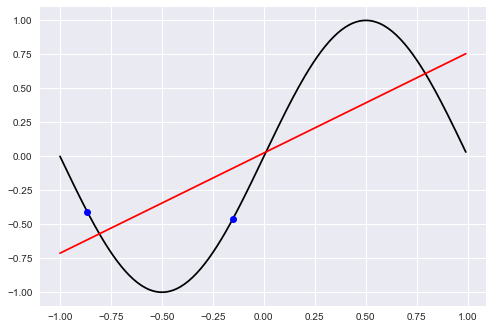

In [139]:
# Trực quan hóa hàm f và 2 điểm dữ liệu được phát sinh ở trên
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

xx = np.arange(-1, 1, 0.01).reshape(-1, 1)
yy = np.sin(np.pi * xx)
plt.plot(xx, yy, color="black")
# plt.plot(xx,(xx**2)*w,color="red") # [2]
# plt.plot(xx,w[0]+(xx**2)*w[1],color="red") # [0,2]
# plt.plot(xx,np.tile(w, 200).reshape(200,1),color="red") #[0]
# plt.plot(xx,w1[0]+xx*w1[1]+(xx**2)*w1[2],color="red")  # [0,1,2]
plt.plot(xx,w1[0]+xx*w1[1],color="red")  # [0,1]
plt.plot(aa, Y, "o", color="blue")
# plt.plot(X, Y, "o", color="blue")

In [84]:
def linearRegression(X,Y):
    X_dagger = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T) # cực tiểu độ lỗi MSE
    w = np.dot(X_dagger, Y)
    return w

In [74]:
def avaragehypothesis(a=1):
    runs =1000
    avgH = 0
    for i in range(runs):
        X,Y = generate_dataset(a)
        w = linearRegression(X,Y)
        avgH += w*1.0/runs
    return avgH        


In [75]:
g_bar = avaragehypothesis()
print("g_bar(x) = ",g_bar)

g_bar(x) =  [[1.39753723]]


Đáp án là [e]

## Câu 5 (1 điểm)

In [76]:
def avgbias():
    runs =1000  # tạo ngẫu nhiên 2 mẫu dữ liệu 1000 lần
    avgBias = 0  # giá trị bias trung bình
    avgH = avaragehypothesis()# xác định g_bar hàm mục tiêu trung bình h(x) = ax 
    for i in range(runs):
        X,Y = generate_dataset(1)  # phát sinh dữ liệu 
        Bias = np.mean(np.power(np.multiply(avgH,X)-Y,2)) # tính bias độ lệch so với hàm mục tiêu f(x) = sin(pi*x)
        # E|(g_bar*X - Y)**2|
        avgBias += Bias/runs # cập nhật bias
    return avgBias

In [77]:
print("Giá trị Bias = ",avgbias())

Giá trị Bias =  0.27443674767348736


Đáp án là: [b]

## Câu 6 (1 điểm)

In [78]:
def avgVar():
    runs = 1000
    avgVar = 0 # giá trị variance trung bình
    avgH = avaragehypothesis() # xác định g_bar hàm mục tiêu trung bình h(x) = ax 
    for i in range(runs):
        X,Y = generate_dataset(1)
        w = linearRegression(X,Y)
        var = np.mean((w*X - avgH*X)**2) #tính variance = E|(g(x)*X - g_bar*X)**2|
        avgVar += var/runs # cập nhật bias
    return avgVar

In [79]:
print("Giá trị variance = ",avgVar())

Giá trị variance =  0.20322638174620847


Đáp án là [a]

## Câu 7 (1 điểm)

In [93]:
def Eout(H): 
    runs = 1000
    avgvar = 0
    avgbias = 0
    Eout = 0
    avgH = avaragehypothesis(H) # xác định g_bar hàm mục tiêu trung bình  
    for i in range(runs):
        X,Y = generate_dataset(H) # tạo 2 mẫu dữ liệu , với tham số loại tập Hypothesis
        w = linearRegression(X,Y) # xác định g(x)
        bias = np.mean(np.power(np.dot(X,avgH)-Y,2)) # tính bias
        var = np.mean(np.power(np.dot(X,w) - np.dot(X,avgH),2)) # tính variance
        v = var/runs
        b = bias/runs
        avgvar += v
        avgbias += b
        Eout += v + b # Eout bằng tổng bias và variance
    return Eout, avgbias,avgvar

In [96]:
# lấy vị trí thứ 0 để xuất ra Eout
# tham số truyền vào là cột cần lấy theo format X(1,x1,x1^2) tương ứng với Tập Hypothesis h(x)
print("[a] Hypothesis của h(x) = b: Eout =",Eout(0)[0]) 
print("[b] Hypothesis của h(x) = ax: Eout =",Eout(1)[0])
print("[c] Hypothesis của h(x) = ax + b : Eout =",Eout([0,1])[0])
print("[d] Hypothesis của h(x) = ax2 : Eout =",Eout(2)[0])
print("[e] Hypothesis của h(x) = ax2 + b : Eout =",Eout([0,2])[0])

[a] Hypothesis của h(x) = b: Eout = 0.729606450458284
[b] Hypothesis của h(x) = ax: Eout = 0.4873742036693277
[c] Hypothesis của h(x) = ax + b : Eout = 0.4186759238475018
[d] Hypothesis của h(x) = ax2 : Eout = 0.7796339196589537
[e] Hypothesis của h(x) = ax2 + b : Eout = 2227.358535334992


In [98]:
Eout([0,1,2])

(0.398353710848867, 0.1991768554244358, 0.19917685542443128)

Đáp án là [b]

## Câu 8 (1 điểm)

Với $ q \geq  1 $ và $ m_{H}(1) = 2$ để thỏa mãn:
$$ m_{H}(N+1) = 2*m_{H}(N) - \binom{N}{q} \tag{1}$$ 
Giả sử nếu $m_{H}(N+1) = 2^{N+1}$ thì $m_{H}(N) = 2^N$ và đặt $ M = N +1$ ta được:
$$(1) \Rightarrow  m_{H}(M) = 2^M - \binom{M-1}{q} $$ 
$ \Rightarrow \binom{M-1}{q} = 0 \Rightarrow  M < q +1$ hay $M \leq q$

Do đó: $d_{vc}(H) = q$

Đáp án là [c]

## Câu 9 (1 điểm)

Tập $ \bigcap_{k=1}^{K}H_{k}$ nhỏ hơn hoặc bằng tất cả bộ hypothesis {$H_{1},H_{2},...,H_{k}$} Do đó:

Với $1\leq i \leq  k$ ta được:
$$ d_{vc}(\bigcap_{k}^{k=1}H_{k}) \leq d_{vc}(H_{i})$$
$$ \Leftrightarrow  d_{vc}(\bigcap_{k}^{k=1}H_{k}) \leq min\{ d_{vc}(H_{i})\} \tag{2} $$
* Trường hợp xấu nhất có thể xảy ra: $ \bigcap_{k=1}^{K}H_{k} = \varnothing  \Rightarrow d_{vc}(\bigcap_{k=1}^{K}H_{k}) = 0 \tag{3}$

Vậy từ $(2)$ và $(3)$ ràng buộc chặt nhất có thể là: $ 0 \leq d_{vc}(\bigcap_{k=1}^{K}H_{k}) \leq min\{ d_{vc}(H_{i})\}_{k=1}^{K}$

Đáp án là [b]

## Câu 10 (1 điểm)

Tập $ \bigcup_{k=1}^{K}H_{k}$ (hợp của tất cả tập hypothesis) lớn hơn hoặc bằng tất cả bộ hypothesis {$H_{1},H_{2},...,H_{k}$}

Do đó: $ d_{vc}(\bigcup_{k=1}^{K}H_{k})$ tối thiểu là $d_{vc}$ lớn nhất trong tất cả hypothesis {$H_{1},H_{2},...,H_{k}$}  
$$ \Leftrightarrow max\{ d_{vc}(H_{i})\}_{k=1}^{K}  \leq  d_{vc}(\bigcup_{k=1}^{K}H_{k}) \tag{4}$$

Đáp án là: [e]